#Assignment 2
##DSC 478 - Programming ML Apps
##Alex Teboul

## Assignment Background
For this assignment you will experiment with various classification models using subsets of some real-world data sets. In particular, you will use the K-Nearest-Neighbor algorithm to classify text documents, experiment with and compare classifiers that are part of the scikit-learn machine learning package for Python, and use some additional preprocessing capabilities of pandas and scikit-learn packages. You will use the data from the data sub-module as well as the existing bank_data file.

## Problem 1
##K-Nearest-Neighbor (KNN) classification on Newsgroups 
[Dataset: newsgroups.zip]

For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

1. trainMatrixModified.txt: the term-document frequency matrix for the training documents. Each row of this matrix corresponds 
to one the terms and each column corresponds to one the documents and the (i,j)th element of the matrix shows the frequency of the 
ith term in the jth document. This matrix contains 5500 rows and 800 columns.

2. testMatrixModified.txt: the term-document frequency for the test documents. The matrix contains 5500 rows and 200 columns.

3. trainClasses.txt: This file contains the labels associated with each training document. Each line is in the format of documentIndex \t 
classId where the documentIndex is in the range of [0,800) and refers to the index of the document in the term-document frequency matrix for train documents. 
The classId refers to one of the two classes and takes one of the values 0 (for Windows) or 1 (for Hockey).

4. testClasses.txt: This file contains the labels associated with each test document. Each line is in the format of documentIndex \t classId where the 
documentIndex is in the range of [0,200) and refers to the index of the document in the term-document frequency matrix for test documents  

5. modifiedterms.txt: This file contains the set of 5500 terms in the vocabulary. Each line contains a term and corresponds to the corresponding rows 
in term-document frequency matrices. 

### a.
Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [0]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#Mount Google Drive to get files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
#Files
#train_matrix
train_matrix_path = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups/trainMatrixModified.txt'
train_matrix = pd.read_csv(train_matrix_path, sep="\t", header=None )
train_matrix.shape
#train_matrix.head()

(5500, 800)

In [22]:
#train_classes
train_classes_path = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups/trainClasses.txt'
train_classes = pd.read_csv(train_classes_path, sep="\t", header=None )
train_classes.shape
#train_classes.head()

(800, 2)

In [23]:
#test_matrix
test_matrix_path = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups/testMatrixModified.txt'
test_matrix = pd.read_csv(test_matrix_path, sep="\t", header=None )
test_matrix.shape
#test_matrix.head()


(5500, 200)

In [24]:
#test_classes
test_classes_path = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups/testClasses.txt'
test_classes = pd.read_csv(test_classes_path, sep="\t", header=None )
test_classes.shape
#test_classes.head(15)

(200, 2)

In [25]:
#test_matrix
mod_terms_path = '/content/drive/My Drive/Colab Notebooks/datasets/newsgroups/modifiedterms.txt'
mod_terms = pd.read_csv(mod_terms_path, sep="\t", header=None )
modt2 = mod_terms.loc[:,0]
mod_terms.head()
mod_terms.shape


(5500, 1)

In [0]:
#transpositions
train_matrix_t = np.array(train_matrix.T)
test_matrix_t = np.array(test_matrix.T)
#Classes in arrays
train_classes = np.array(train_classes)
test_classes = np.array(test_classes)

In [0]:
def knn_clf(training_matrix, training_labels, instance_to_be_classified, k, distance_measure):
  ''' This function takes in a training matrix, training labels/classes, a new data point to be classified, 
  the number of nearest neighbors, and the distance measure "euclidean" or "cosine_similarity". The function
  returns the predicted class of the point and its top k nearest neighbors.'''

  #distance calculation
  if distance_measure == "Euclidean":
    distances = np.sqrt(((training_matrix - instance_to_be_classified)**2).sum(axis=1))
  elif distance_measure =="Cosine_Similarity":
    matrix_norm = np.array([np.linalg.norm(training_matrix[i]) for i in range(len(training_matrix))])
    instance_norm = np.linalg.norm(instance_to_be_classified)
    sim = np.dot(training_matrix,instance_to_be_classified)/(matrix_norm * instance_norm)
    distances = 1 - sim
  else:
    print("Error - Please enter Euclidean or Cosine_Similarity")

  index = np.argsort(distances)
  values = []
  for i in index:
    for j in training_labels:
      if any(i==j):
        values.append(j[1])

  #Classes 0 and 1
  zero_count = 0
  one_count = 0

  #class logic: add up classes to pick most common amongst neighbors
  for value in values[:k]:
    if value == 0:
      zero_count +=1
    elif value == 1:
      one_count +=1

  #getclass
  predicted_class = ''
  if zero_count > one_count:
    predicted_class = 0
  elif zero_count < one_count:
    predicted_class = 1
  else:
    print('choose an odd k - there was a tie. or something else broke')

  top_k_neighbors = index[:k]
  #top_k_distances = sorted(distances)[:k] for distances check

  return predicted_class, top_k_neighbors


In [0]:
#trial run
sample = train_matrix_t[[120]]
mat_wosample = np.delete(train_matrix_t,(120),axis=0)

In [0]:
#trial run
pred_class, top_ks = knn_clf(mat_wosample, train_classes, sample, 5, "Euclidean")

In [62]:
#trial run results
print("Predicted Class: {}".format(pred_class))
print("Top K-Neighbors Index: {}".format(top_ks))

Predicted Class: 1
Top K-Neighbors Index: [512 550 797 756 223]


### b.
Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [0]:
def knn_accuracy(data_matrix, class_labels, k, distance_measure):
  ''' Computes classification accuracy over a test data set. Calls the knn_clf function from part a. A super slow - not optimized knn. But works.'''

  predicted_dict = {}
  actual_dict = {}
  predicted_list = []
  count = -1

  for instance_to_be_classified in data_matrix:
    count += 1
    pred_class, top_ks = knn_clf(data_matrix, class_labels, instance_to_be_classified, k, distance_measure)
    predicted_dict[count] = pred_class
  
  for l in class_labels:
    actual_dict[l[0]] = l[1]
  
  #pull out predicted and actuals
  for keyi, valuei in predicted_dict.items():
    for keyj, valuej in actual_dict.items():
      if keyi == keyj:
        predicted_list.append([valuei,valuej])
  
  tally_correct = 0
  total_tested = 0

  for keyi, valuei in predicted_list:
    if keyi == valuei:
      tally_correct += 1
    total_tested += 1
  
  accuracy = tally_correct/total_tested

  return accuracy

In [55]:
#trial run - pretty slow but it runs
knn_accuracy(test_matrix_t, test_classes, 5, "Euclidean")

0.83

### c.
Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [59]:
# Euclidean:
euclidean_accuracies = []
for knum in range(1,20):
  if knum %2 !=0:
    euclidean_accuracies.append(knn_accuracy(test_matrix_t,test_classes,knum, "Euclidean"))

euclidean_accuracies

[0.995, 0.77, 0.83, 0.92, 0.89, 0.9, 0.93, 0.9, 0.88, 0.875]

In [63]:
# Cosine Similarity:
cosinesim_accuracies = []
for knum in range(1,20):
  if knum %2 !=0:
    cosinesim_accuracies.append(knn_accuracy(test_matrix_t,test_classes,knum, "Cosine_Similarity"))

cosinesim_accuracies

[0.995, 0.99, 0.98, 0.955, 0.935, 0.91, 0.9, 0.855, 0.84, 0.81]

In [68]:
#Get into a dataframe
ks = [1,3,5,7,9,11,13,15,17,19]
euclidean_col = [0.995, 0.77, 0.83, 0.92, 0.89, 0.9, 0.93, 0.9, 0.88, 0.875]
cosinesim_col = [0.995, 0.99, 0.98, 0.955, 0.935, 0.91, 0.9, 0.855, 0.84, 0.81]

ks_data = list(zip(ks, euclidean_col, cosinesim_col))

ks_summary_columns = ['k','euclidean','cosinesim']
ks_summary_df = pd.DataFrame(ks_data, columns = ks_summary_columns)
ks_summary_df

,k,euclidean,cosinesim
0,1,0.995,0.995
1,3,0.770,0.990
2,5,0.830,0.980
3,7,0.920,0.955
4,9,0.890,0.935
5,11,0.900,0.910
6,13,0.930,0.900
7,15,0.900,0.855
8,17,0.880,0.840
9,19,0.875,0.810


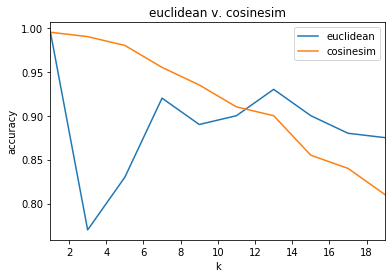

In [77]:
#summarize findings plot
ks_summary_df.plot(x="k", y=["euclidean", "cosinesim"])
plt.title("euclidean v. cosinesim")
plt.ylabel('accuracy')
plt.show()

### d. 
Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on text categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.


In [80]:
# first let's find the doc count for each term
DF_train = np.array([(train_matrix!=0).sum(1)]).T
DF_test = np.array([(test_matrix!=0).sum(1)]).T
NDocs_train = 800
NDocs_test = 200

NMatrix_train = np.ones(np.shape(train_matrix), dtype=float)*NDocs_train
NMatrix_test = np.ones(np.shape(test_matrix), dtype=float)*NDocs_test
np.set_printoptions(precision=2,suppress=True,linewidth=120)


IDF_train  = np.log2(np.divide(NMatrix_train, DF_train))
IDF_test  = np.log2(np.divide(NMatrix_test, DF_test))

tfidf_train = train_matrix * IDF_train
tfidf_test = test_matrix * IDF_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [0]:
# Each term in x must be multiplied by the corresponding idf value
#test_tfidf =  test_matrix * IDF_test[0]
#print (test_tfidf)
# Testclasses ????
#testclasses_tfidf = test_classes * IDF_test
#testclasses_tfidf

In [0]:
# The KNN Search function expects a doc x term matrix as an np array
tfidf_test_t = np.array(tfidf_test.T)

In [0]:
#Method 2 bc method 1 from notes doesn't seem to be working correctly.
def grab_termfreqs(df, r):
    for c in range(0, df.shape[1]):
      termfreqs = df[r,c]
      return termfreqs ## for each row

def grab_idf(df, c):
    listidf = []
    b = 0
    for rv in range(0, df.shape[0]):
        z = df[rv, c]
        listidf.append(z)
    for i in listidf:
        if i != 0:
            b += 1
    if b == 0:
        b = 1 
    return b 

def grab_tfidf(df):
    tfidf_list = []
    nums = df.shape[0]
    for c in range(0, df.shape[1]):
      b = grab_idf(df, c)
      for r in range(0, df.shape[0]):
          temp = grab_termfreqs(df, r)
          tfidf = temp * np.log(nums/b)
          tfidf_list.append(tfidf)
    matrix_fixed = np.array(tfidf_list)
    useable_matrix = matrix_fixed.reshape(df.shape[0], df.shape[1])
    return useable_matrix

test_tfidf_fixed = grab_tfidf(test_matrix_t)

In [121]:
# Euclidean - TFxIDF:
euclidean_accuracies_tfidf = []
for knum in range(1,20):
  if knum %2 !=0:
    euclidean_accuracies_tfidf.append(knn_accuracy(test_tfidf_fixed,test_classes,knum, "Euclidean"))

euclidean_accuracies_tfidf

[0.995, 0.78, 0.695, 0.635, 0.615, 0.58, 0.555, 0.535, 0.57, 0.565]

In [122]:
# Cosine Similarity TFxIDF:
cosinesim_accuracies_tfidf = []
for knum in range(1,20):
  if knum %2 !=0:
    cosinesim_accuracies_tfidf.append(knn_accuracy(test_tfidf_fixed,test_classes,knum, "Cosine_Similarity"))

cosinesim_accuracies_tfidf

[0.995, 0.795, 0.75, 0.67, 0.66, 0.62, 0.62, 0.625, 0.595, 0.585]

In [123]:
#Get into a dataframe
ks_tfidf = [1,3,5,7,9,11,13,15,17,19]
euclidean_col_tfidf = [0.995, 0.78, 0.695, 0.635, 0.615, 0.58, 0.555, 0.535, 0.57, 0.565]
cosinesim_col_tfidf = [0.995, 0.795, 0.75, 0.67, 0.66, 0.62, 0.62, 0.625, 0.595, 0.585]

ks_data_tfidf = list(zip(ks_tfidf, euclidean_col_tfidf, cosinesim_col_tfidf))

ks_summary_columns_tfidf = ['k','euclidean_tfidf','cosinesim_tfidf']
ks_summary_df_tfidf = pd.DataFrame(ks_data_tfidf, columns = ks_summary_columns_tfidf)
ks_summary_df_tfidf

,k,euclidean_tfidf,cosinesim_tfidf
0,1,0.995,0.995
1,3,0.780,0.795
2,5,0.695,0.750
3,7,0.635,0.670
4,9,0.615,0.660
5,11,0.580,0.620
6,13,0.555,0.620
7,15,0.535,0.625
8,17,0.570,0.595
9,19,0.565,0.585


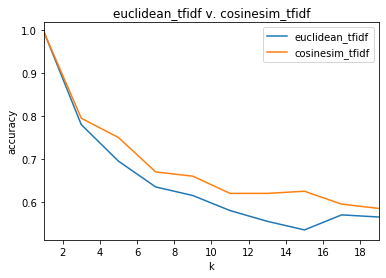

In [124]:
#summarize findings plot
ks_summary_df_tfidf.plot(x="k", y=["euclidean_tfidf", "cosinesim_tfidf"])
plt.title("euclidean_tfidf v. cosinesim_tfidf")
plt.ylabel('accuracy')
plt.show()

*   Not really sure how to interpret this difference. Seems strange that the accuracy drops so much with increasing k. I think I may have erred in my matrix calculation with the tfidfs. I tried two methods, the first produced a flatline for both measures around 0.5 accuracy so I assumed I'd made a mistake. From scratch method 2 also seems to have poor performance. 
*   Based on these results I would not use the TFxIDF but I presume there is a bug in my code I have been unable to locate. 



### e.
Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on text categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [149]:
#From class notes
#d = tfidf_test_t
#m=-2
#for i in range(1,n):
 # s=cosSim(d,p)
 #if s>m:
  #m=s
  #r=c
#return class_r
#X : Training vector {array-like, sparse matrix}, shape (n_samples, n_features).
#y : Target vector relative to X array-like, shape (n_samples,).
X = test_matrix_t
y = test_classes[:,0]

from sklearn.neighbors.nearest_centroid import NearestCentroid
clf_nc=NearestCentroid()
clf_nc.fit(X,y)
#test_matrix_t.shape
#y.shape
print (clf_nc.score(X, y)*100, "%")

100.0 %


*   Not sure what went wrong here to end up with 100 percent...
*   Assuming it's actually 100%, which I doubt because I probably have an error - then it is the best method. Compared to the best from before of Euclidean, this is an improvement of at least 10%accuracy.


## Problem 2
## Classification using scikit-learn 
 [Dataset: bank_data.csv]

 For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in the data section.

Your tasks in this problem are the following:

### a. 
Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [0]:
#Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#Mounts the Google Drive so I can pull the bank_data.csv file from my drive. Like setting working directory.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#File_path
file_path = '/content/drive/My Drive/Colab Notebooks/datasets/bank_data.csv'

In [152]:
#Load in the Dataset
bank_data = pd.read_csv(file_path)
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [153]:
#We don't need that ID column for anything
bank_data.drop('id', axis=1, inplace=True)
bank_data.head(1)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES


In [154]:
#PEP Target Set
pep_target = bank_data.pep
pep_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [158]:
#Attribute Set
bank_attributes = bank_data[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
bank_attributes.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [159]:
bank_dummy = pd.get_dummies(bank_attributes)
bank_dummy.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [0]:
#Split the data into train/test sets
bank_train, bank_test, pep_target_train, pep_target_test = train_test_split(bank_dummy, pep_target, test_size=0.2, random_state=7)


In [161]:
#Inspect bank Test set
print (bank_test.shape)
bank_test[0:5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
261,40,28882.3,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1
132,52,16716.1,2,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
575,37,30488.0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
454,24,16352.2,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1
337,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [162]:
#Inspect bank Train set - can confirm that 480 train to 120 test is 80:20 split.
print (bank_train.shape)
bank_train[0:5]

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
447,35,30799.5,2,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
32,45,23443.2,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0
22,54,38446.6,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
508,60,50409.9,2,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1
427,53,32184.4,2,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0


### b.
Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [163]:
#Normalize the dummy matrix range (0,1)
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

print("bank_train_norm = ", bank_train_norm[0:5])
print("")
print( "bank_test_norm = ", bank_test_norm[0:5])

bank_train_norm =  [[0.35 0.44 0.67 1.   0.   0.   0.   0.   1.   0.   1.   1.   0.   1.   0.   0.   1.   1.   0.  ]
 [0.55 0.32 0.33 0.   1.   0.   0.   1.   0.   0.   1.   0.   1.   0.   1.   0.   1.   1.   0.  ]
 [0.73 0.58 0.   0.   1.   1.   0.   0.   0.   0.   1.   1.   0.   0.   1.   0.   1.   1.   0.  ]
 [0.86 0.78 0.67 0.   1.   0.   0.   1.   0.   1.   0.   1.   0.   0.   1.   0.   1.   0.   1.  ]
 [0.71 0.47 0.67 1.   0.   1.   0.   0.   0.   0.   1.   0.   1.   1.   0.   1.   0.   1.   0.  ]]

bank_test_norm =  [[0.45 0.41 0.33 1.   0.   0.   0.   0.   1.   0.   1.   1.   0.   0.   1.   0.   1.   0.   1.  ]
 [0.69 0.2  0.67 1.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   1.   0.   1.   1.   0.  ]
 [0.39 0.44 0.   0.   1.   0.   0.   0.   1.   0.   1.   1.   0.   0.   1.   0.   1.   0.   1.  ]
 [0.12 0.2  0.   0.   1.   1.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.   1.   0.   1.  ]
 [0.96 0.57 0.33 0.   1.   1.   0.   0.   0.   0.   1.   0.   1.   0.   1.   1.

In [164]:
#Run KNN
n_neighbors = 5

bank_knn_5_w = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
bank_knn_5_w.fit(bank_train_norm, pep_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [165]:
#Get predicted classes
bank_knn_5_w_preds_test = bank_knn_5_w.predict(bank_test_norm)
print(bank_knn_5_w_preds_test)

['YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO']


[[41 28]
 [25 26]]


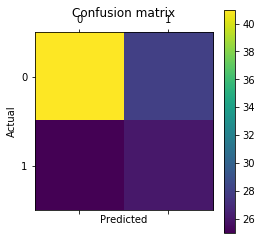

In [166]:
#Generate the confusion matrix
bank_knn_5_w_cm = confusion_matrix(pep_target_test, bank_knn_5_w_preds_test)
print (bank_knn_5_w_cm)

#Plot it
plt.matshow(bank_knn_5_w_cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [167]:
#Classification Report
print(classification_report(pep_target_test, bank_knn_5_w_preds_test))

              precision    recall  f1-score   support

          NO       0.62      0.59      0.61        69
         YES       0.48      0.51      0.50        51

    accuracy                           0.56       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.56      0.56      0.56       120



In [168]:
#Average Accuracy Score
print (bank_knn_5_w.score(bank_test_norm, pep_target_test)*100, "%")

55.833333333333336 %


In [169]:
#K's and W/ & W/o Weight Parameter Testing

#Run KNN
n_neighbors = 7

bank_knn = neighbors.KNeighborsClassifier(n_neighbors)
bank_knn.fit(bank_train_norm, pep_target_train)

#Get predicted classes
bank_knn_preds_test = bank_knn.predict(bank_test_norm)
print(bank_knn_preds_test)

#Generate the confusion matrix
bank_knn_cm = confusion_matrix(pep_target_test, bank_knn_preds_test)
print (bank_knn_cm)

#Classification Report
print(classification_report(pep_target_test, bank_knn_preds_test))

#Average Accuracy Score
print (bank_knn.score(bank_test_norm, pep_target_test)*100, "%")

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES']
[[53 16]
 [22 29]]
              precision    recall  f1-score   support

          NO       0.71      0.77      0.74        69
         YES       0.64      0.57      0.60        51

    accuracy                           0.68       120
   macro avg       0.68      0.67      0.67       120
weighted avg       0.68      0.68      0.68       120

68

In [170]:
#Best Model
n_neighbors_list = [1,1,3,3,5,5,7,7,9,9,11,11]
weights_list = ["yes","no","yes","no","yes","no","yes","no","yes","no","yes","no","yes","no"]
accuracy_scores_list = [60.8,60.8,56.7,56.7,55.8,55.8,64.2,68.3,65.0,68.3,64.2,68.3]
knn_data = list(zip(n_neighbors_list, weights_list, accuracy_scores_list))

knn_summary_columns = ['k','weight parameter','accuracy']
knn_summary_df = pd.DataFrame(knn_data, columns = knn_summary_columns)
knn_summary_df

,k,weight parameter,accuracy
0,1,yes,60.8
1,1,no,60.8
2,3,yes,56.7
3,3,no,56.7
4,5,yes,55.8
5,5,no,55.8
6,7,yes,64.2
7,7,no,68.3
8,9,yes,65.0
9,9,no,68.3


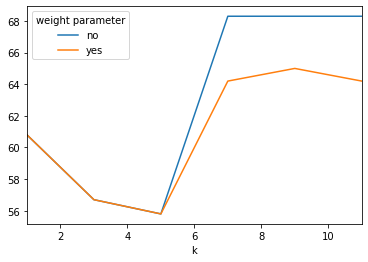

In [171]:
#summarize findings plot
knnplt_df = knn_summary_df.pivot(index='k', columns='weight parameter', values='accuracy')

knnplt_df.plot()

**Discussion**
*   KNN with k=7 and no weight parameter achieved the highest accuracy of 68.3%.
*   It also yielded the highest precision/recall figures as well. I would pick this k and weight paraemter set. The chart above shows the summary of parameters tested.



### c.
Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracy scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

**Decision Tree Classifier**

In [172]:
#Run Descision Tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=12)
treeclf = treeclf.fit(bank_train, pep_target_train)

treepreds_test = treeclf.predict(bank_test)
print (treepreds_test)

['YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES']


[[65  4]
 [ 8 43]]


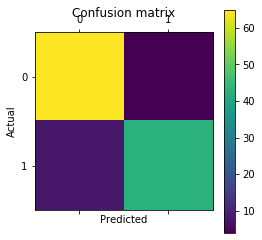

In [173]:
#Confusion Matrix
treecm = confusion_matrix(pep_target_test, treepreds_test)
print (treecm)

plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [174]:
#Classification Report
print(classification_report(pep_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.89      0.94      0.92        69
         YES       0.91      0.84      0.88        51

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.90       120
weighted avg       0.90      0.90      0.90       120



In [175]:
#Average Accuracy Scores
print ("train accuracy:  ", treeclf.score(bank_train, pep_target_train)*100)
print ("test accuracy:  ", treeclf.score(bank_test, pep_target_test)*100)

train accuracy:   92.5
test accuracy:   90.0


*   Was overfitting badly with lower min_samples_split. Could be reasonable now as train and test accuracies are much closer.



**Decision Tree Classifier - Train vs. Test Accuracy**
*   Train Accuracy: 92.5%
*   Test Accuracy: 90.0%
*   This is a pretty solid accuracy, a larger dataset is needed to determine whether or not overfitting is taking place now, but it doesn't appear to be the case.



**Naive Bayes (Gaussian) Classifier**

In [176]:
#Run Naive Bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, pep_target_train)
nbpreds_test = nbclf.predict(bank_test)
print (nbpreds_test)

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES']


[[49 20]
 [26 25]]


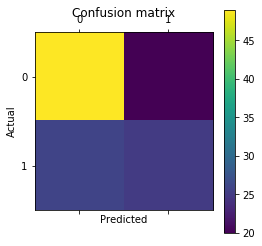

In [177]:
#Confusion Matrix
nbcm = confusion_matrix(pep_target_test, nbpreds_test)
print (nbcm)

plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [178]:
#Classfication Report
print(classification_report(pep_target_test, nbpreds_test))

              precision    recall  f1-score   support

          NO       0.65      0.71      0.68        69
         YES       0.56      0.49      0.52        51

    accuracy                           0.62       120
   macro avg       0.60      0.60      0.60       120
weighted avg       0.61      0.62      0.61       120



In [179]:
#Average Accuracy Scores
print ("train accuracy:  ",nbclf.score(bank_train, pep_target_train)*100)
print ("test accuracy:  ",nbclf.score(bank_test, pep_target_test)*100)

train accuracy:   66.25
test accuracy:   61.66666666666667


**Naive Bayes (Gaussian) Classifier - Train vs. Test Accuracy**
*   Train Accuracy: 66.3 %
*   Test Accuracy: 61.7 %
*   This is a pretty weak result, Naive Bayes like this should not be used on this particular dataset. 


**Train/Test Accuracy and Bias-Variance Trade-Off**
*   Bias Definition: The difference between the average prediction of the model and the correct value the model attempts to predict. 
*   Variance Definition: The variability of model prediction for a given data point or a value which indicates the spread of the data.
*   High Bias means the model may be oversimplified and show in high errors in train and test. The Naive Bayes model above could be said to have high bias.
*   High Variance means the model pays too much attention to the training data and fails to generalize to the test data. This was apparent in the initial trials for the decision tree model I ran with min_samples_split of 3. Specifically, training accuracy was 99%, while testing was mid-80%s. To address this, I increased the min samples to split on, such that training accuracy decreased while testing accuracy increased. In the end settled on 12 samples to split on and had close train/test accuracy around 90%.
*   KNN is different in how to think about train/test accuracy but the model could still be said to have High Bias as well because it didn't fit the data well, shown by low accuracy. 




### d. 
Discuss your observations based on the above experiments.

**Further Observations**
*   Decision Trees: Best Model achieved 90% test accuracy. For this dataset, Decision Trees or similar variants could prove useful. KNN and Naive Bayes were less successful in the classification task. Better Precision/Recall with DT than the other models as well and for such a small dataset, the computational tradeoffs of these different models are negligible. Took some parameter tuning to get this better model result though, and no parameter tuning was done for Naive Bayes while parameter tuning was done for KNN.
*   KNN: Best Model achieved 68% test accuracy. 
*   Naive Bayes: Best Model achieved 62% test accuracy.



## Problem 3
## Data Analysis and Predictive Modeling on Census data 
[Dataset: adult-modified.csv]

For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.

Your tasks in this problem are the following:

### a. Preprocessing and data analysis:

#### 1. Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [0]:
#Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

In [181]:
#Mounts the Google Drive so I can pull the bank_data.csv file from my drive. Like setting working directory.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
#File_path
file_path_census = '/content/drive/My Drive/Colab Notebooks/datasets/adult-modified.csv'
#Load in the Dataset
census_data_pre = pd.read_csv(file_path_census,na_values=["?"])
census_data_pre.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


**To Do**
*   Numeric: Impute and fill in the missing values with the attribute means for age, education, hours-per-week (one by one)
*   Categorical: Remove missing value rows for workclass, marital-status, race, sex, income (dropna)
*   age - 198 na
*   workclass - 588 na




In [183]:
#shape check
census_data_pre.shape

(10000, 8)

In [184]:
#Numeric
census_data = census_data_pre

age_mean = census_data.age.mean() #actually the only numeric with na but I'll do the others anyways..
education_mean = census_data.education.mean()
hpw_mean = census_data['hours-per-week'].mean()

census_data.age.fillna(age_mean, axis=0, inplace=True)
census_data.education.fillna(education_mean, axis=0, inplace=True)
census_data['hours-per-week'].fillna(hpw_mean, axis=0, inplace=True)

census_data.isnull().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [185]:
#shape check
census_data.shape

(10000, 8)

In [186]:
#Categorical
census_data = census_data.dropna()
census_data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [187]:
census_data.shape

(9412, 8)

*    Great. Missing values dealt with.

#### 2. Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distributions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdf2ee49b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efdf2d530f0>]], dtype=object)

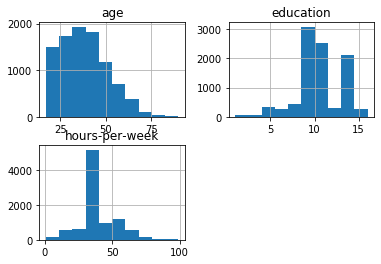

In [188]:
#Numeric Attributes Histograms
census_data.hist()

In [189]:
#Numeric Attributes Description
census_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9412.0,38.366342,12.962039,17.0,28.0,37.0,47.0,90.0
education,9412.0,10.125266,2.542118,1.0,9.0,10.0,13.0,16.0
hours-per-week,9412.0,41.080217,11.884590,1.0,40.0,40.0,45.0,99.0


Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

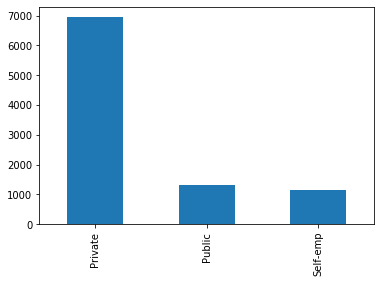

In [190]:
#Categorical Attributes Bar Graphs
#workclass
census_data['workclass'].value_counts().plot(kind='bar')
census_data['workclass'].value_counts()

Married    4737
Single     4675
Name: marital-status, dtype: int64

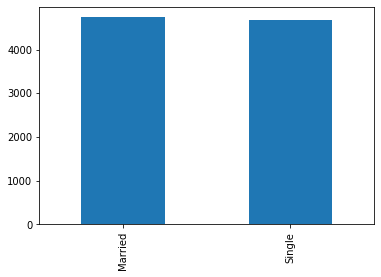

In [191]:
#marital-status
census_data['marital-status'].value_counts().plot(kind='bar')
census_data['marital-status'].value_counts()

White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64

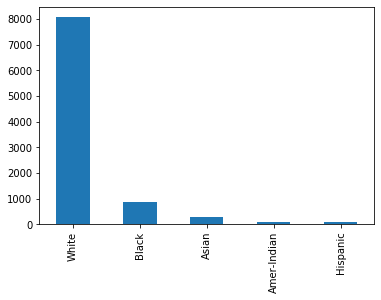

In [192]:
#race
census_data['race'].value_counts().plot(kind='bar')
census_data['race'].value_counts()


Male      6383
Female    3029
Name: sex, dtype: int64

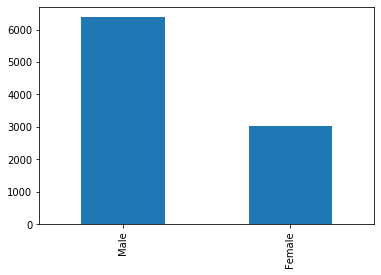

In [193]:
#sex
census_data['sex'].value_counts().plot(kind='bar')
census_data['sex'].value_counts()

<=50K    7093
>50K     2319
Name: income, dtype: int64

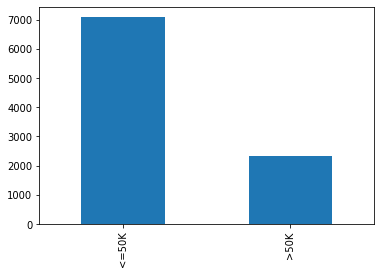

In [194]:
#income
census_data['income'].value_counts().plot(kind='bar')
census_data['income'].value_counts()

#### 3. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [195]:
#education + race cross-tabulation
pd.crosstab(census_data.education,census_data.race)

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


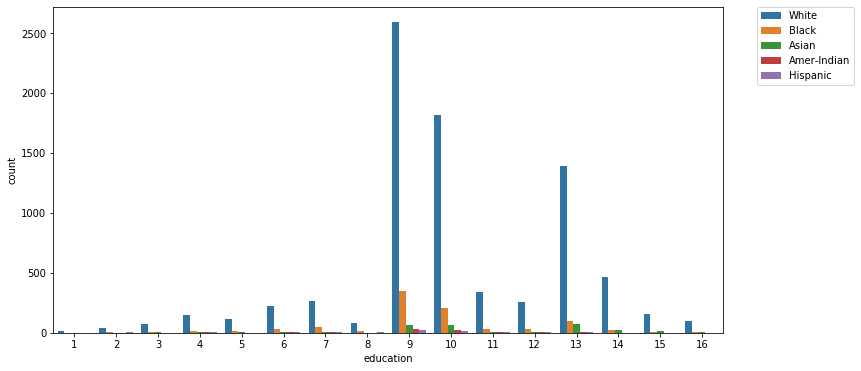

In [196]:
#education + race bar chart
plt.figure(figsize=(12,6))
race_edu_comp = sns.countplot(x="education", hue="race", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [197]:
#work-class + income cross-tabulation
pd.crosstab(census_data.workclass,census_data.income)

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


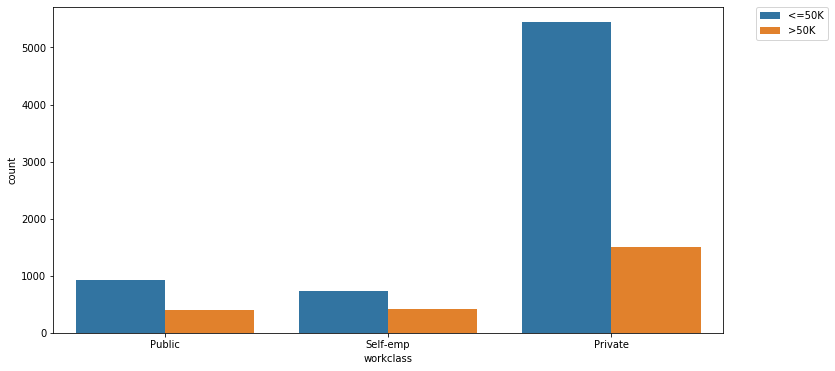

In [198]:
#work-class + income bar chart
plt.figure(figsize=(12,6))
work_inc_comp = sns.countplot(x="workclass", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [199]:
#work-class + race cross-tabulation
pd.crosstab(census_data.workclass,census_data.race)

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


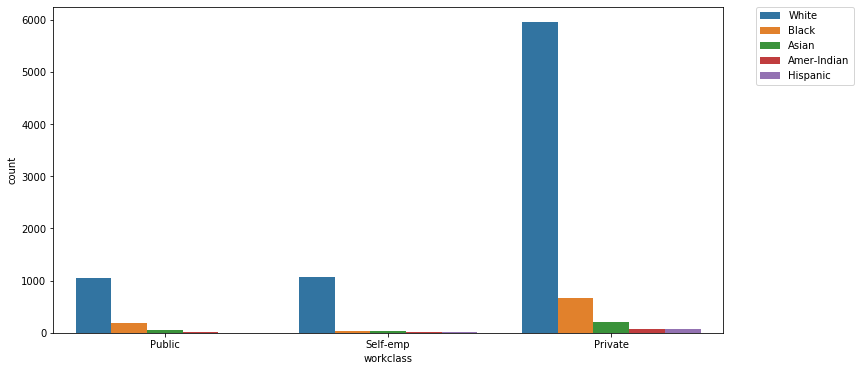

In [200]:
#work-class + race bar chart
plt.figure(figsize=(12,6))
work_rCE_comp = sns.countplot(x="workclass", hue="race", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [201]:
#race + income cross-tabulation
pd.crosstab(census_data.race,census_data.income)

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


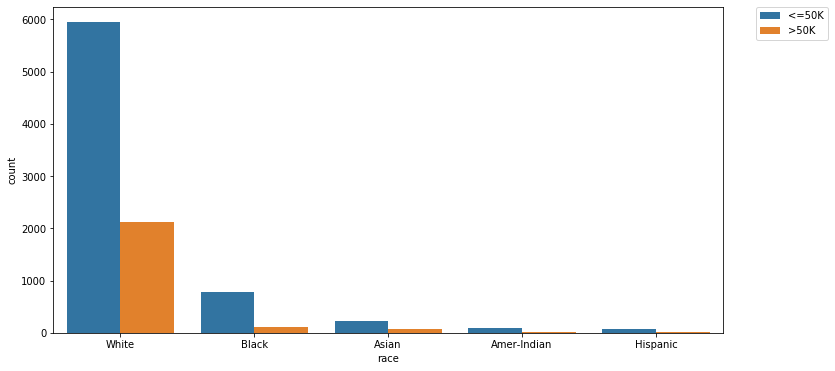

In [202]:
#race + income bar chart
plt.figure(figsize=(12,6))
race_inc_comp = sns.countplot(x="race", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [203]:
#Show the percentages of each race that end up in the low-income category:
#Clean it up (manually):
# intialise data of lists. 
race_lowinc_data = {'Race':['White', 'Black', 'Asian', 'Amer-Indian', 'Hispanic'], 
                 'Percentage_LowIncome':[73.7, 86.7, 77.0, 90.2, 92.0]} 
  
# Create DataFrame 
race_lowinc_df = pd.DataFrame(race_lowinc_data) 
race_lowinc_df = race_lowinc_df.sort_values('Percentage_LowIncome')
# Print the output. 
race_lowinc_df

,Race,Percentage_LowIncome
0,White,73.7
2,Asian,77.0
1,Black,86.7
3,Amer-Indian,90.2
4,Hispanic,92.0


<Figure size 864x432 with 0 Axes>

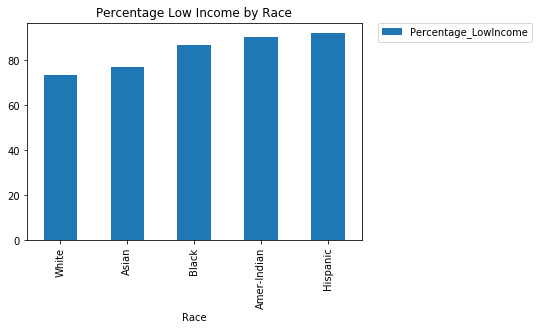

In [204]:
plt.figure(figsize=(12,6))
race_lowinc_df.plot(kind='bar',x='Race',y='Percentage_LowIncome')
plt.title('Percentage Low Income by Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Observations**
*   education + race: In this sample dataset, there are significantly more white in the dataset compared to the other races. When looking at counts of race in each education level, whitehave far larger counts, but relatively it seems that most of the races follow a similar distribution of education received. The greatest counts for each race are around8-9 years of education which is compulsory in the United States. The distributions also appear to be bimodal as a secondary maximum appears around 13 for education. This makes sense because many people go to college. Peaks around graduation milestones (Middle school, High School, College).
*   workclass + income: Public and Self-Employed share similar income outcomes. In the Private Sector there is a greater number of <=50k jobs and in higher proportion to >=50k jobs, but more people in general are also employed in the private sector compared to public and self-employed. 
*   workclass + race: Not much insight available when looking at just counts here. Similar distribution across races. 
*   race + income: Hard to interpret because of the scale, which is why the percentage bar plot that follows is better.
*   Percentage Low Income by Race: Here we see that for the dataset, White race has the lowest percentage of people with LowIncome or income <=50k. For the White race the figure is 73.7%, followed by Asian, then Black, Amer-Indian, and finally Hispanic with 92.0% earning <=50k. Assuming this data scales and explains the greater picture of earnings by Americans across the country, it is a clear sign of the economic disparity that exists by race in the US.




#### 4. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

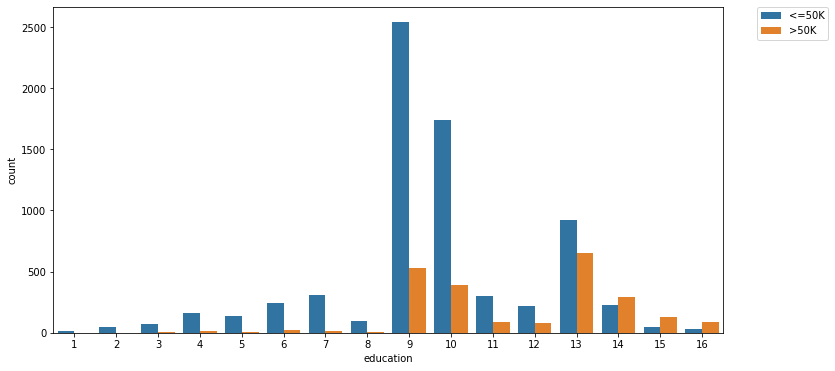

In [205]:
#Extra for analysis:
#education + income bar chart
plt.figure(figsize=(12,6))
race_edu_comp = sns.countplot(x="education", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

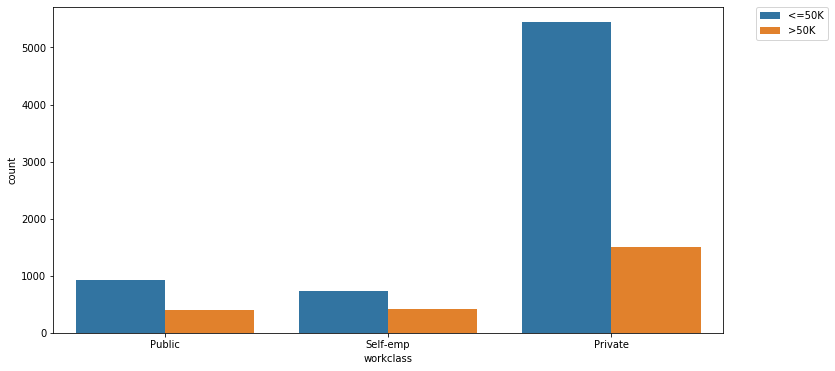

In [206]:
#Extra for analysis:
#workclass + income bar chart
plt.figure(figsize=(12,6))
race_edu_comp = sns.countplot(x="workclass", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

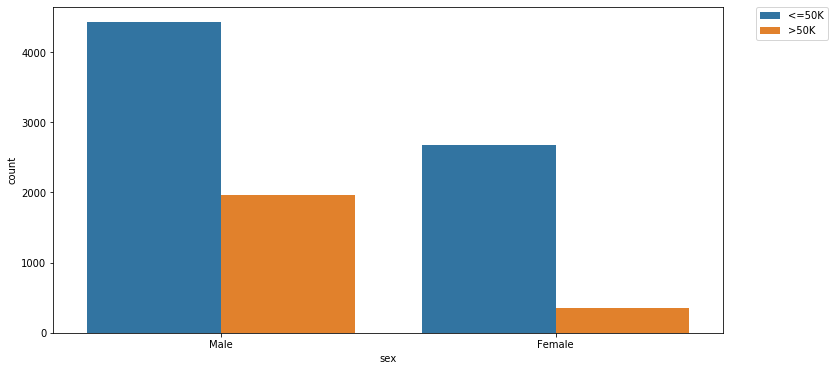

In [207]:
#Extra for analysis:
#sex + income bar chart
plt.figure(figsize=(12,6))
race_edu_comp = sns.countplot(x="sex", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

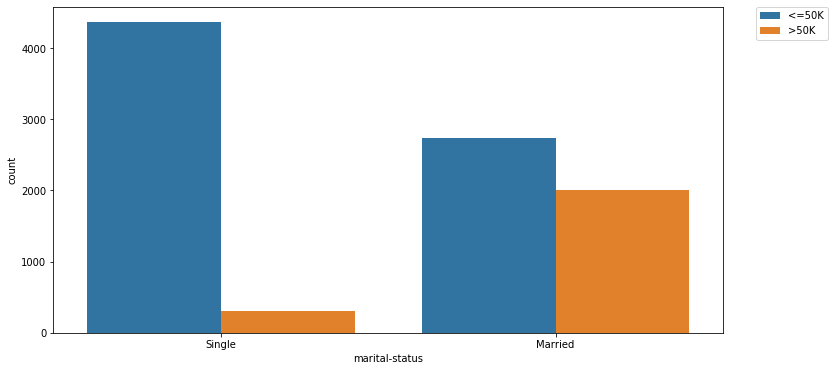

In [208]:
#Extra for analysis:
#marital status + income bar chart
plt.figure(figsize=(12,6))
race_edu_comp = sns.countplot(x="marital-status", hue="income", data=census_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [209]:
#sex + income cross-tabulation
pd.crosstab(census_data.sex,census_data.income)

income,<=50K,>50K
sex,,
Female,2669,360
Male,4424,1959


*   More on this was explained above, but some main take-aways are:
 *   Race seems to play a strong predictive role in low-income vs. high-income figures in the dataset.
 *   Education is also very important as seen above. For people who receive similar amounts of education, receiving more education increases the likelihood of earning >50k.
 *   Workclass shows that self-emp people are more likely to earn >50k relative to their peers who are also self employed than private or public employies are relative to other private/public employees. Public is next, followed by private. There are far more private jobs though, so the predictive power of this attribute is lower than say education.
 *   Sex is also an important indicator of income. Females are 88% low-income while only 69% of Male is low-income in this dataset.
 *   Marital-Status is actually the most predictive of income. Splitting on this in a Decision Tree would probably give pretty solid accuracy. Married individuals are more likely to earn high income.



### b. Predictive Modeling and Model Evaluation:

#### 1. Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [210]:
#Create dummy set
census_dummy = pd.get_dummies(census_data)

#Drop the income_<=50K column
census_dummy = census_dummy.drop(['income_<=50K'],axis=1)

census_dummy.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0


In [211]:
#Target Attribute Set
census_target = census_dummy[['income_>50K']]
census_target.head()

,income_>50K
0,0
1,0
2,0
3,0
4,0


In [212]:
#Training Attributes Set
training_attributes = census_dummy.drop(['income_>50K'], axis=1)
training_attributes.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.0,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.0,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.0,13,40,1,0,0,1,0,0,0,1,0,0,1,0


#### 2. Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [213]:
#Train/Test Split
census_train, census_test, census_target_train, census_target_test = train_test_split(training_attributes, census_target, test_size=0.2, random_state=7)

print (census_test.shape)
census_test[0:5]

(1883, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
6797,49.0,10,40,1,0,0,1,0,0,0,0,0,1,1,0
3931,75.0,3,10,1,0,0,1,0,0,0,1,0,0,0,1
6716,58.0,9,20,0,0,1,1,0,0,0,0,0,1,1,0
9550,40.0,9,66,0,0,1,1,0,0,1,0,0,0,0,1
7633,37.0,5,40,1,0,0,1,0,0,0,0,0,1,0,1


In [214]:
print (census_train.shape)
census_train[0:5]

(7529, 15)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8032,39.0,9,40,0,1,0,1,0,0,0,0,0,1,0,1
9499,19.0,10,15,1,0,0,0,1,0,0,0,0,1,1,0
425,25.0,9,60,1,0,0,1,0,0,0,0,0,1,0,1
742,42.0,14,50,1,0,0,0,1,0,0,0,0,1,1,0
3848,28.0,10,40,1,0,0,0,1,0,0,0,0,1,0,1


**Naive Bayes (Gaussian)**

In [221]:
census_nbclf = naive_bayes.GaussianNB()
#census_nbclf = census_nbclf.fit(census_train, census_target_train)
#print ("Score on Training: ", census_nbclf.score(census_train, census_target_train))
#print ("Score on Test: ", census_nbclf.score(census_test, census_target_test))

census_cv_scores_nb = model_selection.cross_val_score(census_nbclf, training_attributes, census_target, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (census_cv_scores_nb.mean(), census_cv_scores_nb.std() * 2))

Overall Accuracy on X-Val: 0.72 (+/- 0.02)


**Decision Tree using Entropy**



In [217]:
census_treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=100, max_depth=2)
census_cv_scores_tree = model_selection.cross_val_score(census_treeclf, training_attributes, census_target, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (census_cv_scores_tree.mean(), census_cv_scores_tree.std() * 2))

Overall Accuracy on X-Val: 0.81 (+/- 0.02)


**Linear Discriminant Analysis (LDA)**

In [220]:
import warnings
warnings.filterwarnings('ignore')
census_ldclf = LinearDiscriminantAnalysis()
#census_ldclf = census_ldclf.fit(census_train, census_target_train)
#print ("Score on Training: ", census_ldclf.score(census_train, census_target_train))
#print ("Score on Test: ", census_ldclf.score(census_test, census_target_test))

census_cv_scores_ld = model_selection.cross_val_score(census_ldclf, training_attributes, census_target, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (census_cv_scores_ld.mean(), census_cv_scores_ld.std() * 2))

Overall Accuracy on X-Val: 0.81 (+/- 0.02)


*   The LDA was warning of collinearity, this should probably be addressed if a regression like technique is to be used.


*   Naive Bayes: 0.72 (+/- 0.02)
*   Decision Tree: 0.81 (+/- 0.02)
*   LDA: 0.81 (+/- 0.02)





#### 3. For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

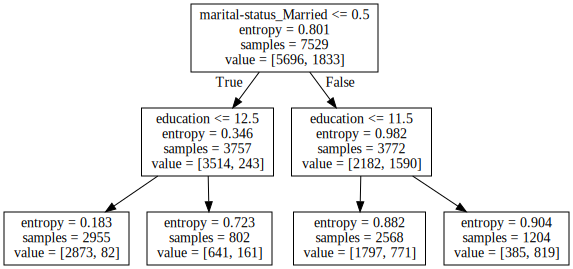

In [109]:
census_treeclf = census_treeclf.fit(census_train, census_target_train)
export_graphviz(census_treeclf,out_file='tree.dot', feature_names=census_train.columns)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

*   Set a lower max depth and didn't lose any accuracy. Simpler model works just as well it appears.

